# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv and test.csv files. The code below will split the first file into train and validation sets.

In [97]:
import pandas as pd

In [98]:
data = pd.read_csv('nlp-getting-started/train.csv')

In [99]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/SGD.ipynb)

In [100]:
data.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [101]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [102]:
data = data.fillna("")

In [103]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


In [104]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [105]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [106]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

## Q2 (2pt)

1. What is the distribution of the classes in the Training set?

2. Plot the bar-plot for 10 mostly frequent values in column "keyword".

Comment on the information you've seen. [EDA notbook could be helpful](https://github.com/anton-selitskiy/RIT_ML/blob/main/EDA_and_Pipeline1.ipynb)

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 1186 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5329 non-null   int64 
 1   keyword   5329 non-null   object
 2   location  5329 non-null   object
 3   text      5329 non-null   object
 4   target    5329 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 249.8+ KB


In [108]:
keyword_counts = train['keyword'].value_counts().head(10)
keyword_counts

keyword
              44
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
Name: count, dtype: int64

<Axes: xlabel='keyword'>

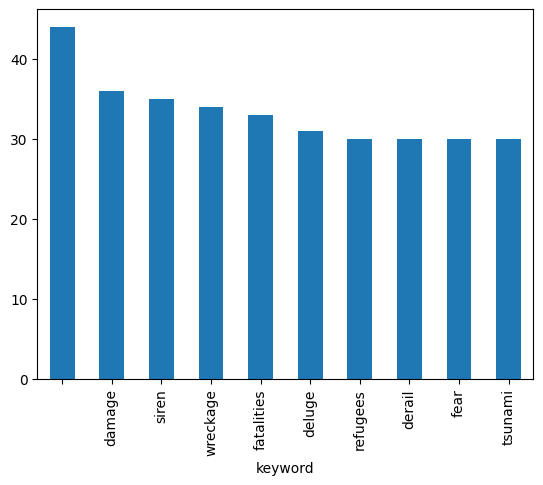

In [109]:
keyword_counts.plot(kind='bar')

An empty string is the most frequent keyword in this dataset.

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [110]:
text = train['keyword'] + train['location'] + train['text']
train.drop('id', axis=1, inplace=True)
train.drop('location', axis=1, inplace=True)
train.drop('keyword', axis=1, inplace=True)
train.drop('text', axis=1, inplace=True)
train['Concatenated'] = text
train.head(3)

,target,Concatenated
1186,0,bridge%20collapseAshes 2015: AustraliaÛªs col...
4071,1,"hailCarol Stream, IllinoisGREAT MICHIGAN TECHN..."
5461,1,policeHouston CNN: Tennessee movie theater sho...


In [111]:
text = validation['keyword'] + validation['location'] + validation['text']
validation.drop('id', axis=1, inplace=True)
validation.drop('location', axis=1, inplace=True)
validation.drop('keyword', axis=1, inplace=True)
validation.drop('text', axis=1, inplace=True)
validation['Concatenated'] = text
validation.head(3)

,target,Concatenated
1740,1,collision'soooota@Zojadelin you literally almo...
4974,1,"meltdownWashington, DCPresident Barack Obama h..."
6053,1,sinkholeA sinkhole grows in Brooklyn: six-mete...


In [112]:
text = test['keyword'] + test['location'] + test['text']
test.drop('id', axis=1, inplace=True)
test.drop('location', axis=1, inplace=True)
test.drop('keyword', axis=1, inplace=True)
test.drop('text', axis=1, inplace=True)
test['Concatenated'] = text
test.head(3)

,target,Concatenated
6334,0,structural%20failure@SirTitan45 Mega mood swi...
3892,0,"flattenedWahpeton, NDPicking up flattened hay ..."
2662,1,detonateWorldwide52.214904 5.139055 Nuke pleas...


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
cnt_vec = CountVectorizer()
train['Concatenated']

1186    bridge%20collapseAshes 2015: AustraliaÛªs col...
4071    hailCarol Stream, IllinoisGREAT MICHIGAN TECHN...
5461    policeHouston CNN: Tennessee movie theater sho...
5787    riotingStill rioting in a couple of hours left...
7445    woundsLake HighlandsCrack in the path where I ...
                              ...                        
5226    obliterationMerica!@Eganator2000 There aren't ...
5390    panicjust had a panic attack bc I don't have e...
860     bloodOmron HEM-712C Automatic Blood Pressure M...
7603    Officials say a quarantine is in place at an A...
7270    whirlwindStamford & Cork (& Shropshire)I moved...
Name: Concatenated, Length: 5329, dtype: object

In [115]:
bow = cnt_vec.fit_transform(train['Concatenated'])

In [116]:
bow.shape

(5329, 22738)

In [117]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [118]:
import re

In [119]:
list(cnt_vec.vocabulary_.items())[:10]

[('bridge', 4091),
 ('20collapseashes', 504),
 ('2015', 297),
 ('australia', 2943),
 ('ûªs', 22707),
 ('collapse', 5237),
 ('at', 2820),
 ('trent', 20306),
 ('among', 2350),
 ('worst', 21971)]

In [120]:
words_with_digits = [word for word in cnt_vec.vocabulary_.keys() if re.search(r'\d', word)]
words_with_digits[:10]

['20collapseashes',
 '2015',
 '60',
 't5trhjuau0',
 'b1g',
 'bmurph1019',
 'termn8r13',
 'oaskgki6qj',
 'di8elzswnr',
 '20accidentsomewhere']

In [121]:
len(words_with_digits)

4590

In [122]:
import string
punctuation_chars = set(string.punctuation)

def contains_punctuation(word):
    return any(char in punctuation_chars for char in word)

words_with_punctuation = [word for word in cnt_vec.vocabulary_.keys() if contains_punctuation(word)]
words_with_punctuation[:10]

['hail_youtsey',
 'û_',
 '_gaabyx',
 'early__may',
 'til_now',
 'marc_holl',
 'mathew_is_angry',
 'z3ke_sk1',
 'derailed_benchmark',
 'chubbysquirrel_']

In [123]:
len(words_with_punctuation)

317

## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [124]:
from nltk.tokenize import TweetTokenizer

In [125]:
tw = TweetTokenizer()

In [126]:
cnt_tw_vec = CountVectorizer()
tokenized_tweets = [' '.join(tw.tokenize(tweet)) for tweet in train['Concatenated'].tolist()]

In [127]:
bow_tw = cnt_tw_vec.fit_transform(tokenized_tweets)
feature_names = cnt_tw_vec.get_feature_names_out()
tw_words_with_digits = [word for word in cnt_tw_vec.vocabulary_.keys() if re.search(r'\d', word)]
tw_words_with_digits[:10]

['20collapseashes',
 '2015',
 '60',
 't5trhjuau0',
 'b1g',
 'bmurph1019',
 'termn8r13',
 'oaskgki6qj',
 'di8elzswnr',
 '20accidentsomewhere']

In [128]:
len(tw_words_with_digits)

4435

In [129]:
words_with_punctuation = [word for word in cnt_tw_vec.vocabulary_.keys() if contains_punctuation(word)]
words_with_punctuation[:10]

['hail_youtsey',
 'û_',
 '_gaabyx',
 'early__may',
 'til_now',
 'marc_holl',
 'mathew_is_angry',
 'z3ke_sk1',
 'derailed_benchmark',
 'chubbysquirrel_']

In [130]:
len(words_with_punctuation)

316

## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer should take a string and return tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [132]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tohab0g/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stemmer = SnowballStemmer('english')

In [134]:
%pip install emoji

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [135]:
import unicodedata
import emoji

def is_latin(text):
    for char in text:
      try:
        if not unicodedata.name(char).startswith(('LATIN', 'COMMON')):
            return False
      except Exception:
        return False
    return True

In [136]:
def custom_tokenizer(text):
    # Lowercase transformation
    text = text.lower()

    # Tokenize using TweetTokenizer
    tokens = TweetTokenizer().tokenize(text)

    # Filter tokens based on criteria
    filtered_tokens = []
    for token in tokens:
    # Keep tokens that contain only Latin characters, "smileys", or valid hashtags
        # Check if the token is an emoji (contains only punctuation and at least one parenthesis)
        if emoji.is_emoji(token):
            # print('here1')
            filtered_tokens.append(token)
        # Check if the token is a hashtag containing only Latin letters after the initial #
        elif re.match(r'^#[A-Za-z]+$', token):
            # print('here2')
            filtered_tokens.append(token)
        # Check if the token contains only Latin characters
        elif is_latin(token):
            # print('here3')
            filtered_tokens.append(token)
        elif re.match(r'(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)', token):
            filtered_tokens.append(token)


    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in filtered_tokens if token.lower() not in stop_words]

    # Perform stemming
    stemmed_tokens =  [stemmer.stem(w) for w in filtered_tokens]

    return stemmed_tokens

In [137]:
train.iloc[0]['Concatenated']
print(stemmer.stem("😀"))

😀


In [138]:
stemmed_tokens = custom_tokenizer("Hi there :)")
print(stemmed_tokens)

['hi', ':)']


## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [139]:
from sklearn.preprocessing import MaxAbsScaler
count_vec = CountVectorizer(tokenizer=custom_tokenizer)
bow = count_vec.fit_transform(train['Concatenated'])
bow_valid = count_vec.transform(validation['Concatenated'])
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_valid = scaler.transform(bow_valid)

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
clf_bow = LogisticRegression(max_iter=200, random_state=42)

In [142]:
clf_bow.fit(bow, train['target'])

LogisticRegression(max_iter=200, random_state=42)

In [143]:
pred = clf_bow.predict(bow_valid)

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(validation['target'], pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       807
           1       0.79      0.67      0.73       563

    accuracy                           0.79      1370
   macro avg       0.79      0.77      0.78      1370
weighted avg       0.79      0.79      0.79      1370



In [146]:
clf_bow.n_features_in_

13975

In [147]:
bow

<5329x13975 sparse matrix of type '<class 'numpy.float64'>'
	with 48933 stored elements in Compressed Sparse Row format>

## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
vec1 = TfidfVectorizer(tokenizer=custom_tokenizer)

In [150]:
vec1_train = vec1.fit_transform(train['Concatenated'])
vec1_valid = vec1.transform(validation['Concatenated'])
scaler = MaxAbsScaler()
vec1_train = scaler.fit_transform(vec1_train)
vec1_valid = scaler.transform(vec1_valid)

clf1 = LogisticRegression(max_iter=200, random_state=42)
clf1.fit(vec1_train, train['target'])
pred = clf1.predict(vec1_valid)
print(classification_report(validation['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       807
           1       0.75      0.69      0.72       563

    accuracy                           0.78      1370
   macro avg       0.78      0.77      0.77      1370
weighted avg       0.78      0.78      0.78      1370



In [151]:
vec1_train.shape

(5329, 13975)

In [152]:
vec2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
vec2_train = vec2.fit_transform(train['Concatenated'])
vec2_valid = vec2.transform(validation['Concatenated'])
scaler = MaxAbsScaler()
vec2_train = scaler.fit_transform(vec2_train)
vec2_valid = scaler.transform(vec2_valid)

clf2 = LogisticRegression(max_iter=200, random_state=42)
clf2.fit(vec2_train, train['target'])
pred = clf2.predict(vec2_valid)
print(classification_report(validation['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       807
           1       0.75      0.69      0.72       563

    accuracy                           0.78      1370
   macro avg       0.78      0.77      0.77      1370
weighted avg       0.78      0.78      0.78      1370



In [153]:
vec2_train

<5329x13975 sparse matrix of type '<class 'numpy.float64'>'
	with 48933 stored elements in Compressed Sparse Row format>

In [154]:
vec3 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.001)
vec3_train = vec3.fit_transform(train['Concatenated'])
vec3_valid = vec3.transform(validation['Concatenated'])
scaler = MaxAbsScaler()
vec3_train = scaler.fit_transform(vec3_train)
vec3_valid = scaler.transform(vec3_valid)

clf3 = LogisticRegression(max_iter=200, random_state=42)
clf3.fit(vec3_train, train['target'])
pred = clf3.predict(vec3_valid)
print(classification_report(validation['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       807
           1       0.74      0.68      0.71       563

    accuracy                           0.77      1370
   macro avg       0.76      0.76      0.76      1370
weighted avg       0.77      0.77      0.77      1370



In [155]:
vec3_train

<5329x1576 sparse matrix of type '<class 'numpy.float64'>'
	with 31409 stored elements in Compressed Sparse Row format>

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [156]:
from sklearn.preprocessing import MaxAbsScaler
count_vec = CountVectorizer(tokenizer=custom_tokenizer)
bow = count_vec.fit_transform(train['Concatenated'])
bow_test = count_vec.transform(test['Concatenated'])
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)
clf_bow = LogisticRegression(max_iter=200, random_state=42)
clf_bow.fit(bow, train['target'])
pred = clf_bow.predict(bow_test)
print(classification_report(test['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       511
           1       0.80      0.66      0.72       403

    accuracy                           0.78       914
   macro avg       0.78      0.76      0.77       914
weighted avg       0.78      0.78      0.77       914



In [157]:
vec1 = TfidfVectorizer(tokenizer=custom_tokenizer)
vec1_train = vec1.fit_transform(train['Concatenated'])
vec1_test = vec1.transform(test['Concatenated'])
scaler = MaxAbsScaler()
vec1_train = scaler.fit_transform(vec1_train)
vec1_test = scaler.transform(vec1_test)

clf1 = LogisticRegression(max_iter=200, random_state=42)
clf1.fit(vec1_train, train['target'])
pred = clf1.predict(vec1_test)
print(classification_report(test['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       511
           1       0.79      0.69      0.74       403

    accuracy                           0.78       914
   macro avg       0.78      0.77      0.78       914
weighted avg       0.78      0.78      0.78       914



In [158]:
vec2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
vec2_train = vec2.fit_transform(train['Concatenated'])
vec2_test = vec2.transform(test['Concatenated'])
scaler = MaxAbsScaler()
vec2_train = scaler.fit_transform(vec2_train)
vec2_test = scaler.transform(vec2_test)

clf2 = LogisticRegression(max_iter=200, random_state=42)
clf2.fit(vec2_train, train['target'])
pred = clf2.predict(vec2_test)
print(classification_report(test['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       511
           1       0.79      0.69      0.74       403

    accuracy                           0.78       914
   macro avg       0.78      0.77      0.78       914
weighted avg       0.78      0.78      0.78       914



In [159]:
vec3 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.001)
vec3_train = vec3.fit_transform(train['Concatenated'])
vec3_test = vec3.transform(test['Concatenated'])
scaler = MaxAbsScaler()
vec3_train = scaler.fit_transform(vec3_train)
vec3_test = scaler.transform(vec3_test)

clf3 = LogisticRegression(max_iter=200, random_state=42)
clf3.fit(vec3_train, train['target'])
pred = clf3.predict(vec3_test)
print(classification_report(test['target'], pred))

/home/tohab0g/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       511
           1       0.82      0.69      0.75       403

    accuracy                           0.80       914
   macro avg       0.80      0.79      0.79       914
weighted avg       0.80      0.80      0.80       914



## Q11 (2pt)
Visualize the most important features.

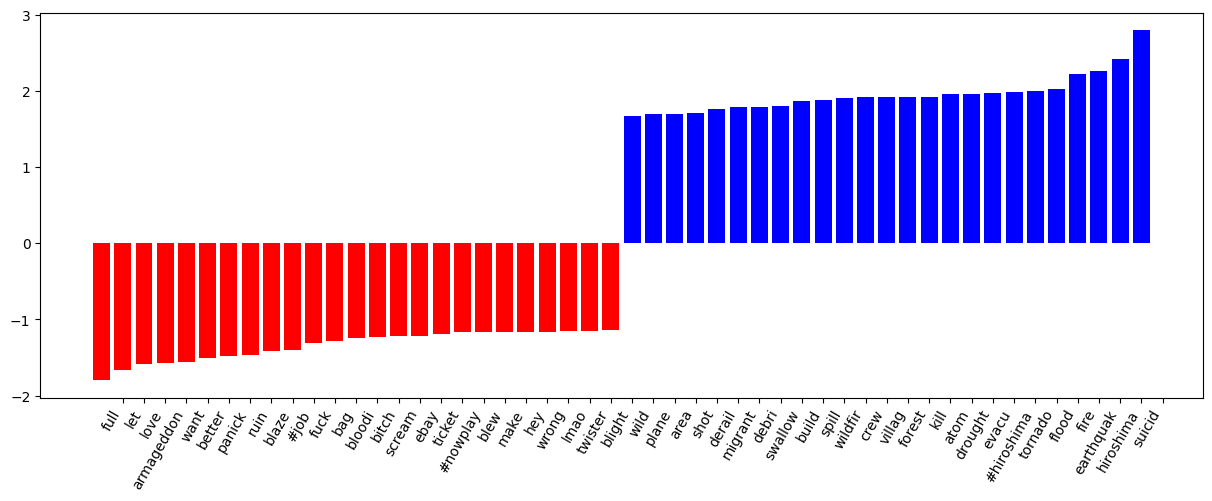

In [160]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

def visualize_coeefficients(classifier, feature_names, n_features=25):
  coef = classifier.coef_.ravel()
  positive_coefficients = np.argsort(coef)[-n_features:]
  negative_coefficients = np.argsort(coef)[:n_features]
  all_coefs = np.hstack([negative_coefficients, positive_coefficients])

  plt.figure(figsize=(15, 5))
  colors = ["red" if c < 0 else "blue" for c in coef[all_coefs]]
  plt.bar(np.arange(2*n_features), coef[all_coefs], color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(1, 1+2*n_features), feature_names[all_coefs], rotation=60, ha="right")

visualize_coeefficients(clf3, vec3.get_feature_names_out())

From the plot above, words suicid, hiroshima, earthquake, fire have a blue color or classfied as a disaster.